In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

diabetes = datasets.load_diabetes()
diab = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diab['Target']=diabetes.target
diab2 = diab.copy(deep=True)
print(diab)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  Target  
0   -0.002592  0.019907 -0.0176

In [8]:
vars = set(diab.columns)
vars.remove('Target')
model_vars = []
best_pval = 0
pval_threshold = .05

while (len(vars)>0) and (best_pval < pval_threshold):
    test_models = []
    for var in vars:
        #creates a model for target vs previously selected model variables + a variable.  On first pass model_vars would be nothing but growth with each iteration
        regr_model = "{} ~ {}".format('Target', ' + '.join(model_vars + [var]))
        print(regr_model)
        testmodel = smf.ols(regr_model, diab)
        testmodel_fit = testmodel.fit()
        pval_testmodel = testmodel_fit.pvalues[-1]
        test_models.append((pval_testmodel, var))
    test_models.sort()
    best_pval, selected_var = test_models.pop(0)
    if (best_pval < pval_threshold):
        model_vars.append(selected_var)
        vars.remove(selected_var)

Target ~ bp
Target ~ s2
Target ~ bmi
Target ~ sex
Target ~ s4
Target ~ age
Target ~ s1
Target ~ s3
Target ~ s6
Target ~ s5
Target ~ bmi + bp
Target ~ bmi + s2
Target ~ bmi + sex
Target ~ bmi + s4
Target ~ bmi + age
Target ~ bmi + s1
Target ~ bmi + s3
Target ~ bmi + s6
Target ~ bmi + s5
Target ~ bmi + s5 + bp
Target ~ bmi + s5 + s2
Target ~ bmi + s5 + sex
Target ~ bmi + s5 + s4
Target ~ bmi + s5 + age
Target ~ bmi + s5 + s1
Target ~ bmi + s5 + s3
Target ~ bmi + s5 + s6
Target ~ bmi + s5 + bp + s2
Target ~ bmi + s5 + bp + sex
Target ~ bmi + s5 + bp + s4
Target ~ bmi + s5 + bp + age
Target ~ bmi + s5 + bp + s1
Target ~ bmi + s5 + bp + s3
Target ~ bmi + s5 + bp + s6
Target ~ bmi + s5 + bp + s1 + s2
Target ~ bmi + s5 + bp + s1 + sex
Target ~ bmi + s5 + bp + s1 + s4
Target ~ bmi + s5 + bp + s1 + age
Target ~ bmi + s5 + bp + s1 + s3
Target ~ bmi + s5 + bp + s1 + s6
Target ~ bmi + s5 + bp + s1 + sex + s2
Target ~ bmi + s5 + bp + s1 + sex + s4
Target ~ bmi + s5 + bp + s1 + sex + age
Target ~ bm

In [9]:
regr_model = "{} ~ {}".format('Target', '+'.join(model_vars))
model = smf.ols(regr_model, diab).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     76.95
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           3.01e-65
Time:                        15:22:43   Log-Likelihood:                -2387.3
No. Observations:                 442   AIC:                             4789.
Df Residuals:                     435   BIC:                             4817.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.572     59.159      0.0

In [10]:
diab['y_pred'] = model.predict(diab)
diab['residual'] = diab['Target'] - diab['y_pred']
std_res = diab['residual'].std()
diab['std_res'] = diab['residual']/std_res
print(diab.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target      y_pred   residual   std_res  
0 -0.002592  0.019907 -0.017646   151.0  211.276563 -60.276563 -1.122563  
1 -0.039493 -0.068332 -0.092204    75.0   67.486483   7.513517  0.139928  
2 -0.002592  0.002861 -0.025930   141.0  180.798238 -39.798238 -0.741184  
3  0.034309  0.022688 -0.009362   206.0  166.571751  39.428249  0.734293  
4 -0.002592 -0.031988 -0.046641   135.0  129.815941   5.184059  0.096546  


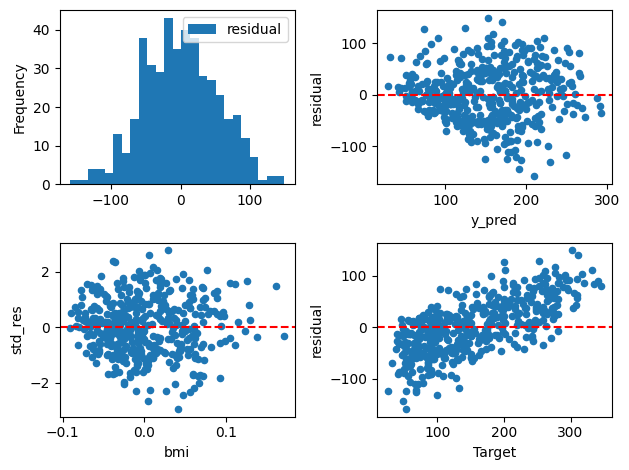

In [12]:
fig, ((hist1, res_yp), (res_bmi, res_y)) = plt.subplots(2, 2)

diab.plot(y='residual', kind='hist', bins=25, ax=hist1)
diab.plot('y_pred', 'residual', kind='scatter', ax=res_yp)
res_yp.axhline(y=0, c='red', linestyle='dashed')

diab.plot('bmi', 'std_res', kind='scatter', ax=res_bmi)
res_bmi.axhline(y=0, c='red', linestyle='dashed')
diab.plot('Target', 'residual', kind='scatter', ax=res_y)
res_y.axhline(y=0, c='red', linestyle='dashed')

fig.tight_layout()
plt.show()